In [6]:
from src.evaluate import evaluate_dataset

def plot_pehe_heatmap_ard_regularized(
    d_list=[5, 10, 15, 20, 25, 30, 35],
    sample_sizes=range(50, 1500, 150),
    seeds=range(5),
    polynomial_degree=2,
    max_iterations=100
):
    """
    Computes and visualizes a heatmap of √PEHE for CMGP using variance-weighted ARD initialization.

    This reproduces the enhanced version of Experiment 1 (Failure Mode 1) from Section 4.1.1
    of the paper. It evaluates whether the proposed variance-regularized ARD mechanism improves
    model robustness in high-dimensional settings and small sample regimes.

    Args:
        d_list (list[int]): Covariate dimensions to test (confounders + modifiers).
        sample_sizes (iterable[int]): Synthetic sample sizes.
        seeds (list[int]): Seeds for averaging results.
        polynomial_degree (int): Polynomial degree for outcome generation.
        max_iterations (int): Maximum number of training steps for CMGP.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from pathlib import Path

    heatmap_data = []

    for d in d_list:
        n_c = 2                   # Keep number of confounders fixed
        n_m = d - 2               # Vary number of effect modifiers
        row = []
        for n in sample_sizes:
            pehes = []
            for seed in seeds:
                result = evaluate_dataset(
                    "synthetic",
                    data_path=Path("src/data"),
                    n_confounders=n_c,
                    n_effect_modifiers=n_m,
                    n_instruments=0,
                    n_samples=n,
                    seed=seed,
                    polynomial_degree=polynomial_degree,
                    max_gp_iterations=max_iterations,
                    variance_ard=True,             # Enable enhancement
                    overlap_scaling=False          # Keep overlap scaling disabled
                )
                pehes.append(result["√PEHE"])
            row.append(np.mean(pehes))
        heatmap_data.append(row)

    # Plotting the √PEHE heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        np.array(heatmap_data),
        xticklabels=list(sample_sizes),
        yticklabels=d_list,
        cmap="magma",
        annot=True, fmt=".2f",
        cbar_kws={"label": "√PEHE"}
    )
    plt.xlabel("Sample Size")
    plt.ylabel("Covariate Dimension (d)")
    plt.title("√PEHE with Variance-Regularized ARD (Fixed Confounders)")
    plt.tight_layout()
    plt.show()

[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.037 0.89  0.859 0.737 1.477]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.013 0.61  1.139 0.822 1.415]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.869 0.575 1.122 1.241 1.193]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.803 1.492 1.031 0.881 0.794]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.793 0.782 1.065 1.058 1.302]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.252 1.327 0.597 0.502 1.322]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.122 0.438 1.296 1.08  1.

 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:166: RuntimeWarning:overflow encountered in divide
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\rbf.py:178: RuntimeWarning:invalid value encountered in multiply


[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.963 0.929 0.989 0.941 1.084 1.227 0.831 0.748 1.216 1.071]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.622 0.788 1.294 0.856 0.859 0.949 1.381 1.125 1.102 1.024]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.56  0.96  0.771 1.323 0.96  1.279 0.784 1.598 0.97  0.797]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.765 1.075 0.718 0.698 1.218 1.058 1.187 1.144 0.99  1.149]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.169 1.02  1.214 0.686 1.122 0.896 0.964 0.861 1.033 1.036]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.332 0.951 0.704 1.045 0.777 0.839 0.713 1.047 1.336 1.257]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.671 0.763 1.329 1.282 1.085 1.109 0.655 1.146 0.747 1.213]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.631 1.576 0.857 0.958 0.617 1.027 0.953 1.177 1.288 0.918]
[Ridge T-Learner ARD Init] First 10 leng

 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in divide


[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.506 1.35  2.512 0.943 0.57  0.599 0.438 0.45  0.949 0.891]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.432 1.415 1.036 0.549 1.64  1.105 1.133 1.018 0.671 1.22 ]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.507 0.671 1.294 0.734 0.604 1.11  0.573 1.209 1.756 0.906]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.339 0.892 1.056 0.746 1.048 1.01  1.452 1.028 0.993 1.082]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.808 1.171

 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in divide


[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.122 1.099 1.041 1.096 0.978 1.005 0.964 1.155 0.911 1.066]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.995 0.836 0.947 0.803 0.885 1.117 1.03  1.011 0.861 0.998]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.958 0.809 1.162 0.972 1.215 1.011 1.222 0.845 1.04  1.172]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.901 0.796 1.164 1.032 0.767 1.131 1.326 1.053 1.04  0.98 ]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.955 1.127 1.121 1.236 0.79  0.978 0.944 0.758 1.14  1.067]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.062 0.86  0.947 0.826 1.28  1.014 0.837 0.748 0.778 0.85 ]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.141 1.061 1.143 1.265 1.096 0.893 1.006 0.789 1.206 0.7  ]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.718 1.174 0.937 0.716 1.02  0.915 1.182 1.512 1.027 0.836]
[Ridge T-Learner ARD Init] First 10 leng

 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in divide


[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.164 0.932 1.08  0.901 0.973 1.075 0.86  1.084 1.01  0.962]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [1.024 0.841 0.784 0.948 0.767 0.937 1.231 0.962 0.936 1.128]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.961 1.033 0.902 1.211 1.039 1.161 0.962 0.818 1.171 1.065]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.791 1.459 0.914 0.818 1.081 1.165 0.82  0.989 1.053 0.754]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.757 1.074 0.881 1.048 1.011 0.743 0.987 1.235 1.145 1.105]
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.814 0.956 0.831 1.131 1.027 1.463 0.973 0.798 0.809 0.958]
[Ridge T-L

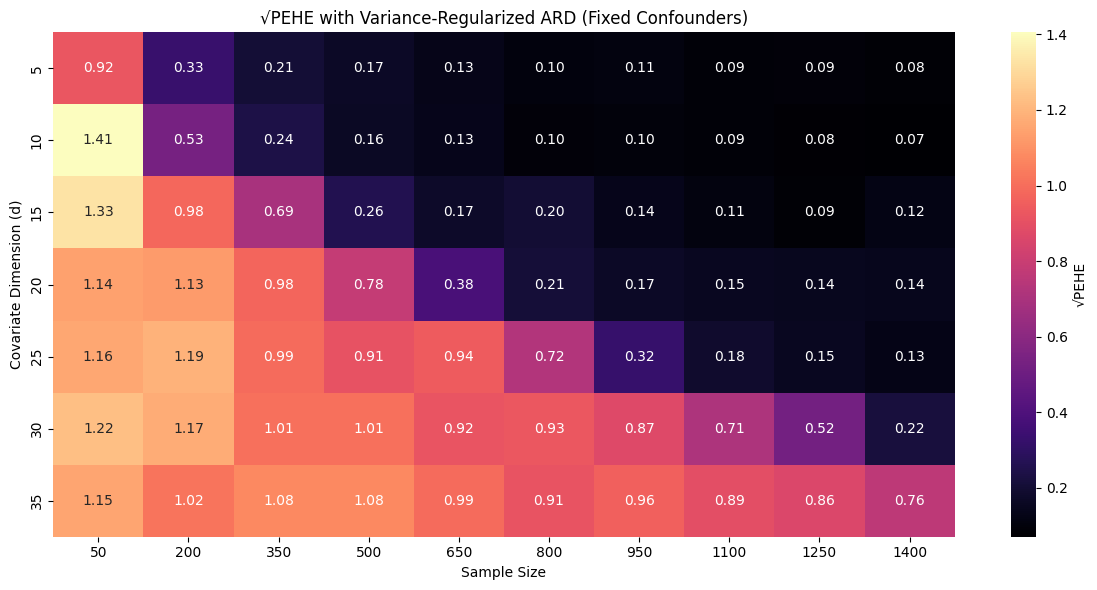

In [6]:
plot_pehe_heatmap_ard_regularized()
